### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('train.csv')

### EDA

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# Checking for null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df.shape

(10886, 12)

In [7]:
#Dropping unnecessary columns
df.drop('datetime',axis=1,inplace=True)

In [8]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

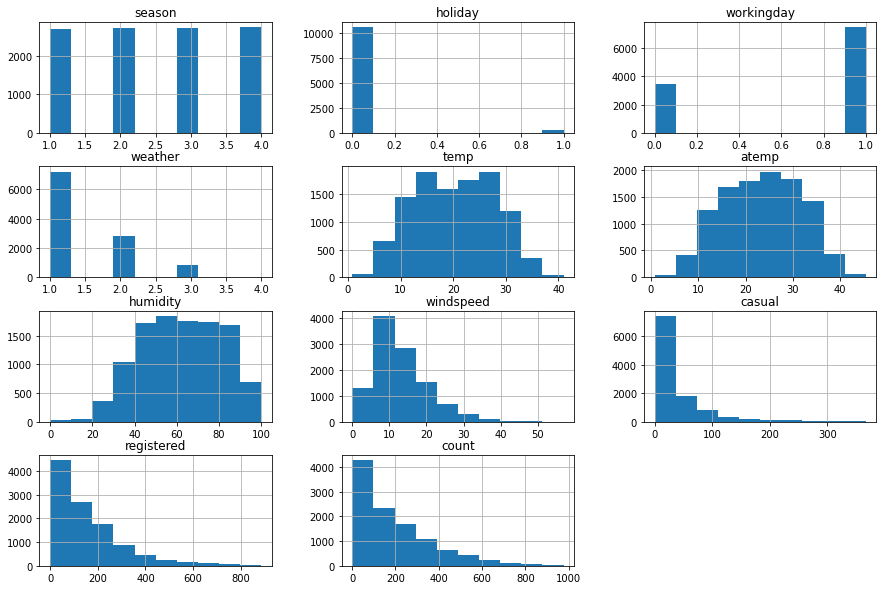

In [9]:
df.hist(figsize=(15,10))

<AxesSubplot:xlabel='season', ylabel='count'>

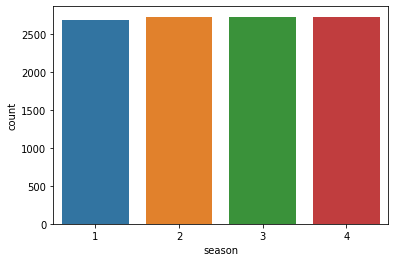

In [10]:
sns.countplot(x='season',data=df)

<AxesSubplot:xlabel='holiday', ylabel='count'>

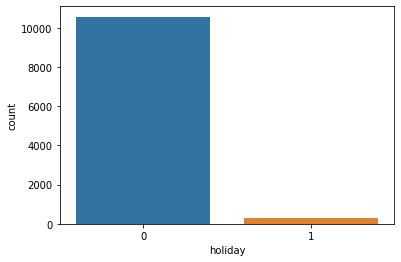

In [11]:
sns.countplot(x='holiday',data=df)

<AxesSubplot:xlabel='workingday', ylabel='count'>

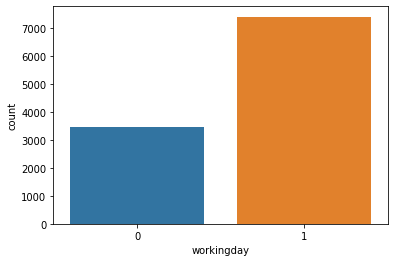

In [12]:
sns.countplot(x='workingday',data=df)

<AxesSubplot:xlabel='weather', ylabel='count'>

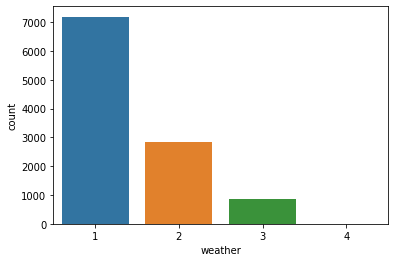

In [13]:
sns.countplot(x='weather',data=df)

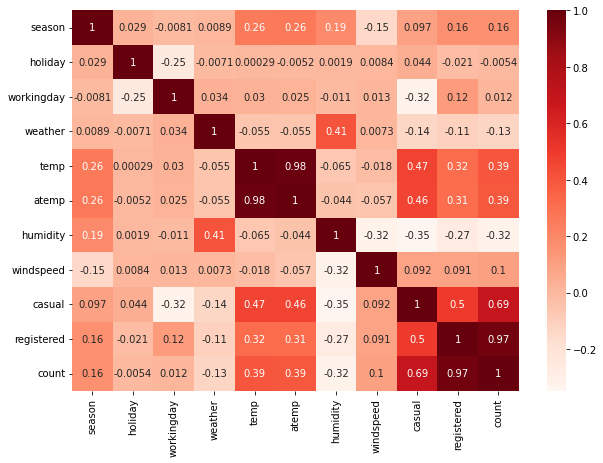

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

In [15]:
df['count'].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

### Separating dependent and independent values

In [16]:
X=df.drop('count',axis=1)
y=df['count']

In [17]:
X.shape

(10886, 10)

In [18]:
y.shape

(10886,)

### Performing train-test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
mean_squared_error(y_test,y_hat)

0.2330086769469135

In [24]:
lr.score(X_train,y_train)

1.0

In [25]:
lr.score(X_test,y_test)

0.9999929406147272

In [26]:
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(X_train,y_train)
y_hat2=rr.predict(X_test)

In [27]:
mean_squared_error(y_test,y_hat2)

8.679871028466481

In [28]:
from xgboost import XGBRegressor

In [29]:
xr=XGBRegressor()
xr.fit(X_train,y_train)
y_hat3=xr.predict(X_test)

In [30]:
mean_squared_error(y_test,y_hat3)

14.755821235162802

#### Thus we are going to use Linear Regression because of its accuracy